# Load the models

In [1]:
import cobra
from cobra import Reaction

In [3]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("ecoli.json")
pf = load_json_model("pf.json")
# print(ecoli.optimize())
# print(pf.optimize())
    
# load peripheral packages
import warnings
warnings.filterwarnings(action='once')
from pandas import set_option
set_option("display.max_rows", None)
from time import process_time

# Load the conditions

In [4]:
# Define the standard graphs from each simulation
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False,
        # "parsed":True
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        "parsed": True
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

In [5]:
species_abundances = {
    1:{"ecoli":0, "pf":1},
    2:{"ecoli":1, "pf":50},
    3:{"ecoli":1, "pf":20},
    4:{"ecoli":1, "pf":10},
    5:{"ecoli":1, "pf":3},
    6:{"ecoli":1, "pf":1},
    7:{"ecoli":3, "pf":1},
    8:{"ecoli":10, "pf":1},
    9:{"ecoli":20, "pf":1},
    10:{"ecoli":1, "pf":0},
    11:{"ecoli":0, "pf":0}
}
carbon_conc_series = {'rows': {
    'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
    'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
}}
species_identities_rows = {
    1:{"ecoli":"mRuby"},
    2:{"ecoli":"ACS"},
    3:{"ecoli":"mRuby"},
    4:{"ecoli":"ACS"},
    5:{"ecoli":"mRuby"},
    6:{"ecoli":"ACS"}
}

# Simulate

In [6]:
for met in ecoli.metabolites:
    print(met.name)

ABEE_c0
2-Amino-4-hydroxy-6-hydroxymethyl-7-8-dihydropteridinediphosphate_c0
PPi_c0
H+_c0
Dihydropteroate_c0
ATP_c0
Glycine_c0
gamma-Glutamylcysteine_c0
ADP_c0
Phosphate_c0
GSH_c0
IMP_c0
PRPP_c0
HYXN_c0
H+_e0
Adenosine_e0
Adenosine_c0
NAD_c0
2,3-Dihydroxy-2,3-dihydrobenzoate_c0
NADH_c0
2,3-Dihydroxybenzoate_c0
heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA_c0
phospho-heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA_c0
Acetyl-CoA_c0
L-Serine_c0
CoA_c0
O-Acetyl-L-serine_c0
CMP_c0
CDP_c0
Fumarate_e0
Fumarate_c0
UDP-N-acetylglucosamine_c0
Undecaprenyl-diphospho-N-acetylmuramoyl-L-alanyl-D-glutamyl-meso-2-6-diaminopimeloyl-D-alanyl-D-alanine_c0
UDP_c0
Undecaprenyl-diphospho-N-acetylmuramoyl--N-acetylglucosamine-L-ala-D-glu-meso-2-6-diaminopimeloyl-D-ala-D-ala_c0
H2O_c0
Isochorismate_c0
Pyruvate_c0
fa6_c0
AMP_c0
fa6coa_c0
L-Glutamate_c0
L-Cysteine_c0
7-methyl-trans-oct-2-enoyl-ACP_c0
7-methyl-octanoyl-ACP_c0
FAD_c0
L-Malate_c0
Oxaloacetate_c0
FADH2_c0
dCDP_c0
dCTP_c0
CO2_c0
Phosphoenolpyruvate

In [7]:
# checking if the metabolite of interest is in the E.coli model

exists = "false"
for met in ecoli.metabolites:
    if met.id == "cpd01630_c0":
        exists = "true"
print(exists)

false


In [26]:
# checking if the metabolite of interest is in the P.fluorescens model

exists = "false"
for met in pf.metabolites:
    if met.id == "cpd01630_c0":
        exists = "true"
print(exists)

false


## Parameterize the data

In [ ]:
%%time 

%run data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, requisite_biomass, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'Maltose': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]}, #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                'Acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                #'Acetate': {"consumed":["cpd00029"], # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                #'4-Hydroxybenzoate': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                'D-Glucose': {"consumed":["cpd00027"],
                        "excreted":["cpd00480"]},
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)

/Users/ashleyeng/Documents/Python/ProjectNotebooks/CommunityModeling/CommPhitting/data/standardized_data/datastandardization.py:113: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)



 GCF_000005845.2.RAST.mdl

 GCF_001612705.1.RAST.mdl


### A bioproduction phenotype

In [15]:
# checking if the exchange reaction is in P.fluorescens  model

exists = "false"
for ex in pf.exchanges:
    if ex.id == "EX_cpd00153_c0":
        exists = "true"
print(exists)

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


false


In [10]:
exists = "false"
for ex in ecoli.exchanges:
    if met.id == "EX_cpd01630_c0":
        exists = "true"
print(exists)

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


false


In [11]:
for exRXN in ecoli.exchanges:
    print(exRXN.id)

EX_cpd00067_e0
EX_cpd00182_e0
EX_cpd00106_e0
EX_cpd00075_e0
EX_cpd00064_e0
EX_cpd00108_e0
EX_cpd00036_e0
EX_cpd11576_e0
EX_cpd04097_e0
EX_cpd00154_e0
EX_cpd00033_e0
EX_cpd00412_e0
EX_cpd00012_e0
EX_cpd00118_e0
EX_cpd01030_e0
EX_cpd00161_e0
EX_cpd00129_e0
EX_cpd00971_e0
EX_cpd01012_e0
EX_cpd00635_e0
EX_cpd00039_e0
EX_cpd01155_e0
EX_cpd00246_e0
EX_cpd01055_e0
EX_cpd00020_e0
EX_cpd00276_e0
EX_cpd00082_e0
EX_cpd00080_e0
EX_cpd00023_e0
EX_cpd15560_e0
EX_cpd15561_e0
EX_cpd00367_e0
EX_cpd00063_e0
EX_cpd00058_e0
EX_cpd00107_e0
EX_cpd00573_e0
EX_cpd00184_e0
EX_cpd00224_e0
EX_cpd00314_e0
EX_cpd01017_e0
EX_cpd00222_e0
EX_cpd00013_e0
EX_cpd01217_e0
EX_cpd00051_e0
EX_cpd00244_e0
EX_cpd11578_e0
EX_cpd00179_e0
EX_cpd00205_e0
EX_cpd00355_e0
EX_cpd00100_e0
EX_cpd00009_e0
EX_cpd00281_e0
EX_cpd00079_e0
EX_cpd00060_e0
EX_cpd00438_e0
EX_cpd00034_e0
EX_cpd10516_e0
EX_cpd00249_e0
EX_cpd00214_e0
EX_cpd00119_e0
EX_cpd00654_e0
EX_cpd00076_e0
EX_cpd03198_e0
EX_cpd11579_e0
EX_cpd01171_e0
EX_cpd00210_e0
EX_cpd0017

In [12]:
# create requisite exchange metabolite
cyto_met = pf.metabolites.get_by_id("cpd01630_c0")
ex_met = cyto_met.copy()
ex_met.id = "cpd01630_e0"
ex_met.compartment = "e0"

# add metabolite to each model
ecoli.add_metabolites([ex_met])
pf.add_metabolites([ex_met])

# add exchange reactions
ecoli.add_boundary(ex_met, type="exchange")
pf.add_boundary(ex_met, type="exchange")
#ecoli.add_boundary(ecoli.metabolites.get_by_id("EX_cpd00480_e0"), type="exchange")
#pf.add_boundary(pf.metabolites.get_by_id("EX_cpd00480_e0"), type="exchange")

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reaction identifier,EX_cpd01630_e0
Name,"cis,cis-Muconate_c0 exchange"
Memory address,0x132889d90
Stoichiometry,"cpd01630_e0 <=> cis,cis-Muconate_c0 <=>"
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [18]:
# defining corresponding transport reaction
cpd01630_tr = Reaction("cpd016300_tr")
cpd01630_tr.name = "cpd01630 Transport"
cpd01630_tr.add_metabolites({
    ex_met: -1, cyto_met: 1
})

In [21]:
# defining corresponding transport reaction
cpd00153_tr = Reaction("cpd00153_tr")
cpd00153_tr.name = "cpd00153 Transport"
cpd00153_tr.add_metabolites({
    ex_met: -1, cyto_met: 1
})

In [22]:
%%time 

%run data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, requisite_biomass, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                #'Maltose': {"consumed":["cpd00179"],
                        # "excreted":["cpd00029"]}, #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                #'Acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                #"2-Dehydro-D-gluconate": {"consumed":["cpd00480"]},
                'D-Glucose': {"consumed":["cpd00027"],
                        "excreted": ["cpd01630"]},
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                #'Acetate': {"consumed":["cpd00029"], # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                #'4-Hydroxybenzoate': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                'Benzoate': {"consumed":["cpd00153"],
                        "excreted":["cpd01630"]},
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)

/Users/ashleyeng/Documents/Python/ProjectNotebooks/CommunityModeling/CommPhitting/data/standardized_data/datastandardization.py:113: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)



 GCF_000005845.2.RAST.mdl

 GCF_001612705.1.RAST.mdl
NoFluxError: The (+) net flux of 0.0 for the EX_cpd00153_e0 phenotype indicates that it is an implausible phenotype.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 1

## Define the LP

In [24]:
%%time

%run mscommphitting.py

def _partition_coefs(initial_val, divisor):
    return (initial_val, initial_val/divisor, initial_val/divisor**2, initial_val/divisor**3, initial_val/divisor**4)

muconic_acid_co = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, '/Users/ashleyeng/Documents/Python/ModelSEEDDatabase', growth_df, experimental_metadata)
muconic_acid_co.define_problem(
    parameters = {'cvmin': .1, 'bcv': 0.0001, "stationary": 5e-3},
    mets_to_track = ["cpd00027", "cpd00153", "cpd01630"],
    rel_final_conc = {"cpd00027":0.1},
    zero_start = ["cpd00153", "cpd01630"],
    #abs_final_conc = {"cpd00029":0}, # metabolomics data
    export_zip_name = 'muconic_acid_co.zip',
    requisite_biomass = requisite_biomass,
    biomass_coefs=_partition_coefs(1, 2),
    export_lp = "muconic_acid_co.lp"
)

/Users/ashleyeng/Documents/Python/ProjectNotebooks/CommunityModeling/CommPhitting/mscommphitting.py:80: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.012254950000000046 min
Done with DCC loop: 0.0014506499999999533 min
Done with the DBC & diffc loop: 0.005365866666666719 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.12552225000000009 min
Done exporting the content: 0.06545076666666651 min
CPU times: user 22.9 s, sys: 1.6 s, total: 24.5 s
Wall time: 27 s


## Solve and display results

starting optimization
muconic_acid_co.zip
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'D~Glucose', 'Benzoate', 'stationary'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}


/Users/ashleyeng/Documents/Python/ProjectNotebooks/CommunityModeling/CommPhitting/mscommphitting.py:886: UserWarning: The conversion factor 5e-06 optimized to a bound, which may be indicative of an error, such as improper kinetic rates.
  warnings.warn(f"The conversion factor {value} optimized to a bound, which may be "
/Users/ashleyeng/Documents/Python/ProjectNotebooks/CommunityModeling/CommPhitting/mscommphitting.py:80: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
ic| mscommphitting.py:1148 in graph()- name: 'OD'
ic| mscommphitting.py:1148 in graph()- name: 'pf'
ic| mscommphitting.py:1148 in graph()- name: 'ecoli'


graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00027', 'cpd00153', 'cpd01630'],
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'trial': 'G6'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': True,
 'p

ic| mscommphitting.py:1148 in graph()- name: 'OD'
ic| mscommphitting.py:1148 in graph()- name: 'pf'
ic| mscommphitting.py:1148 in graph()- name: 'ecoli'
ic| mscommphitting.py:1148 in graph()- name: 'OD'
ic| mscommphitting.py:1148 in graph()- name: 'pf'
ic| mscommphitting.py:1148 in graph()- name: 'ecoli'


graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}
Optimization completed in 4.0650729666666665 minutes
Graphing completed in 0.08185129999999959 minutes
CPU times: user 4min 4s, sys: 4.22 s, total: 4min 8s
Wall time: 4min 6s


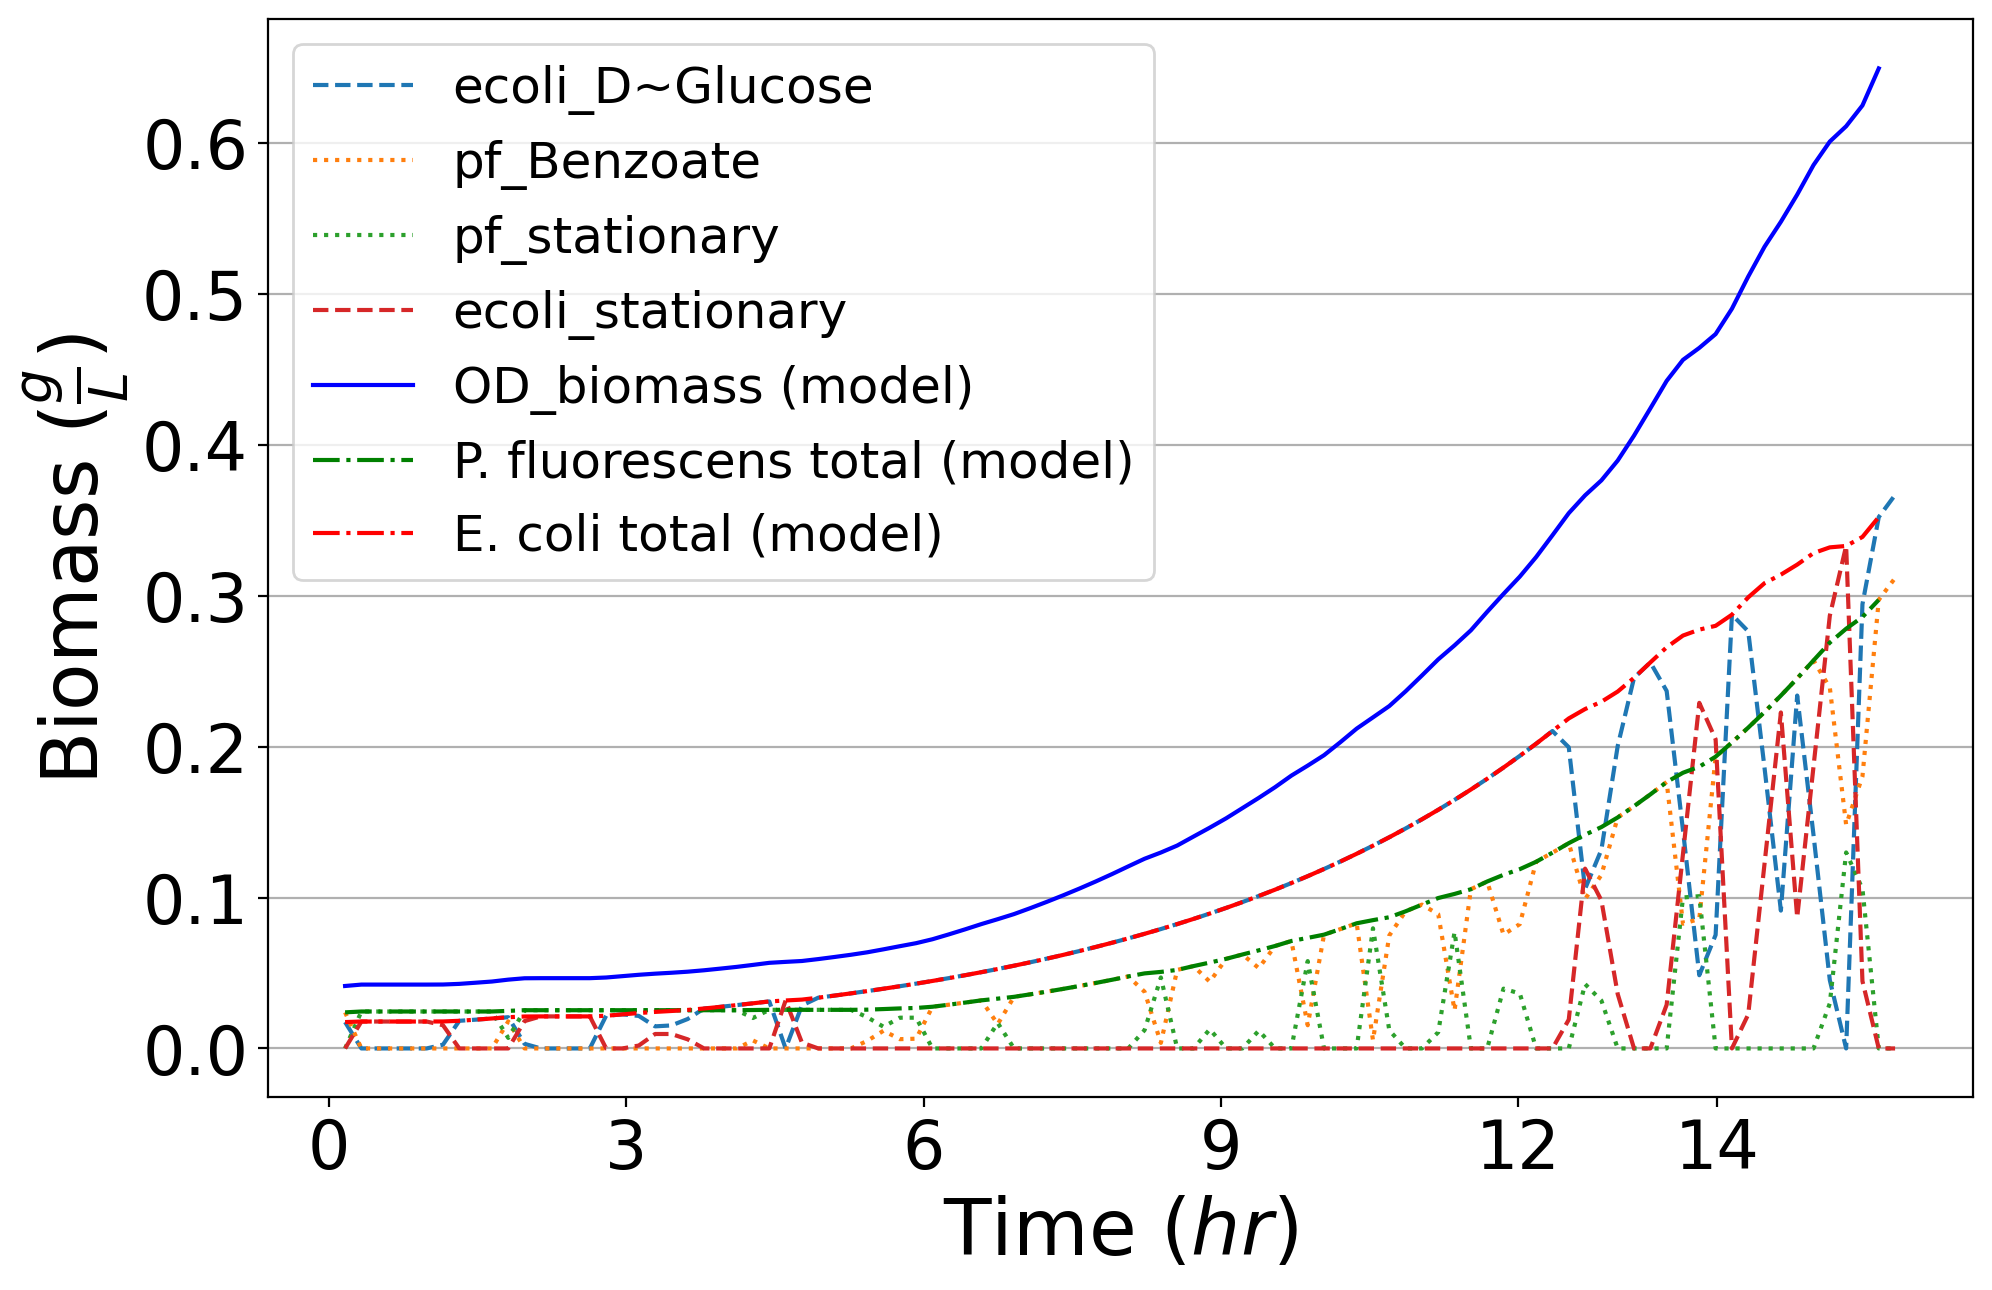

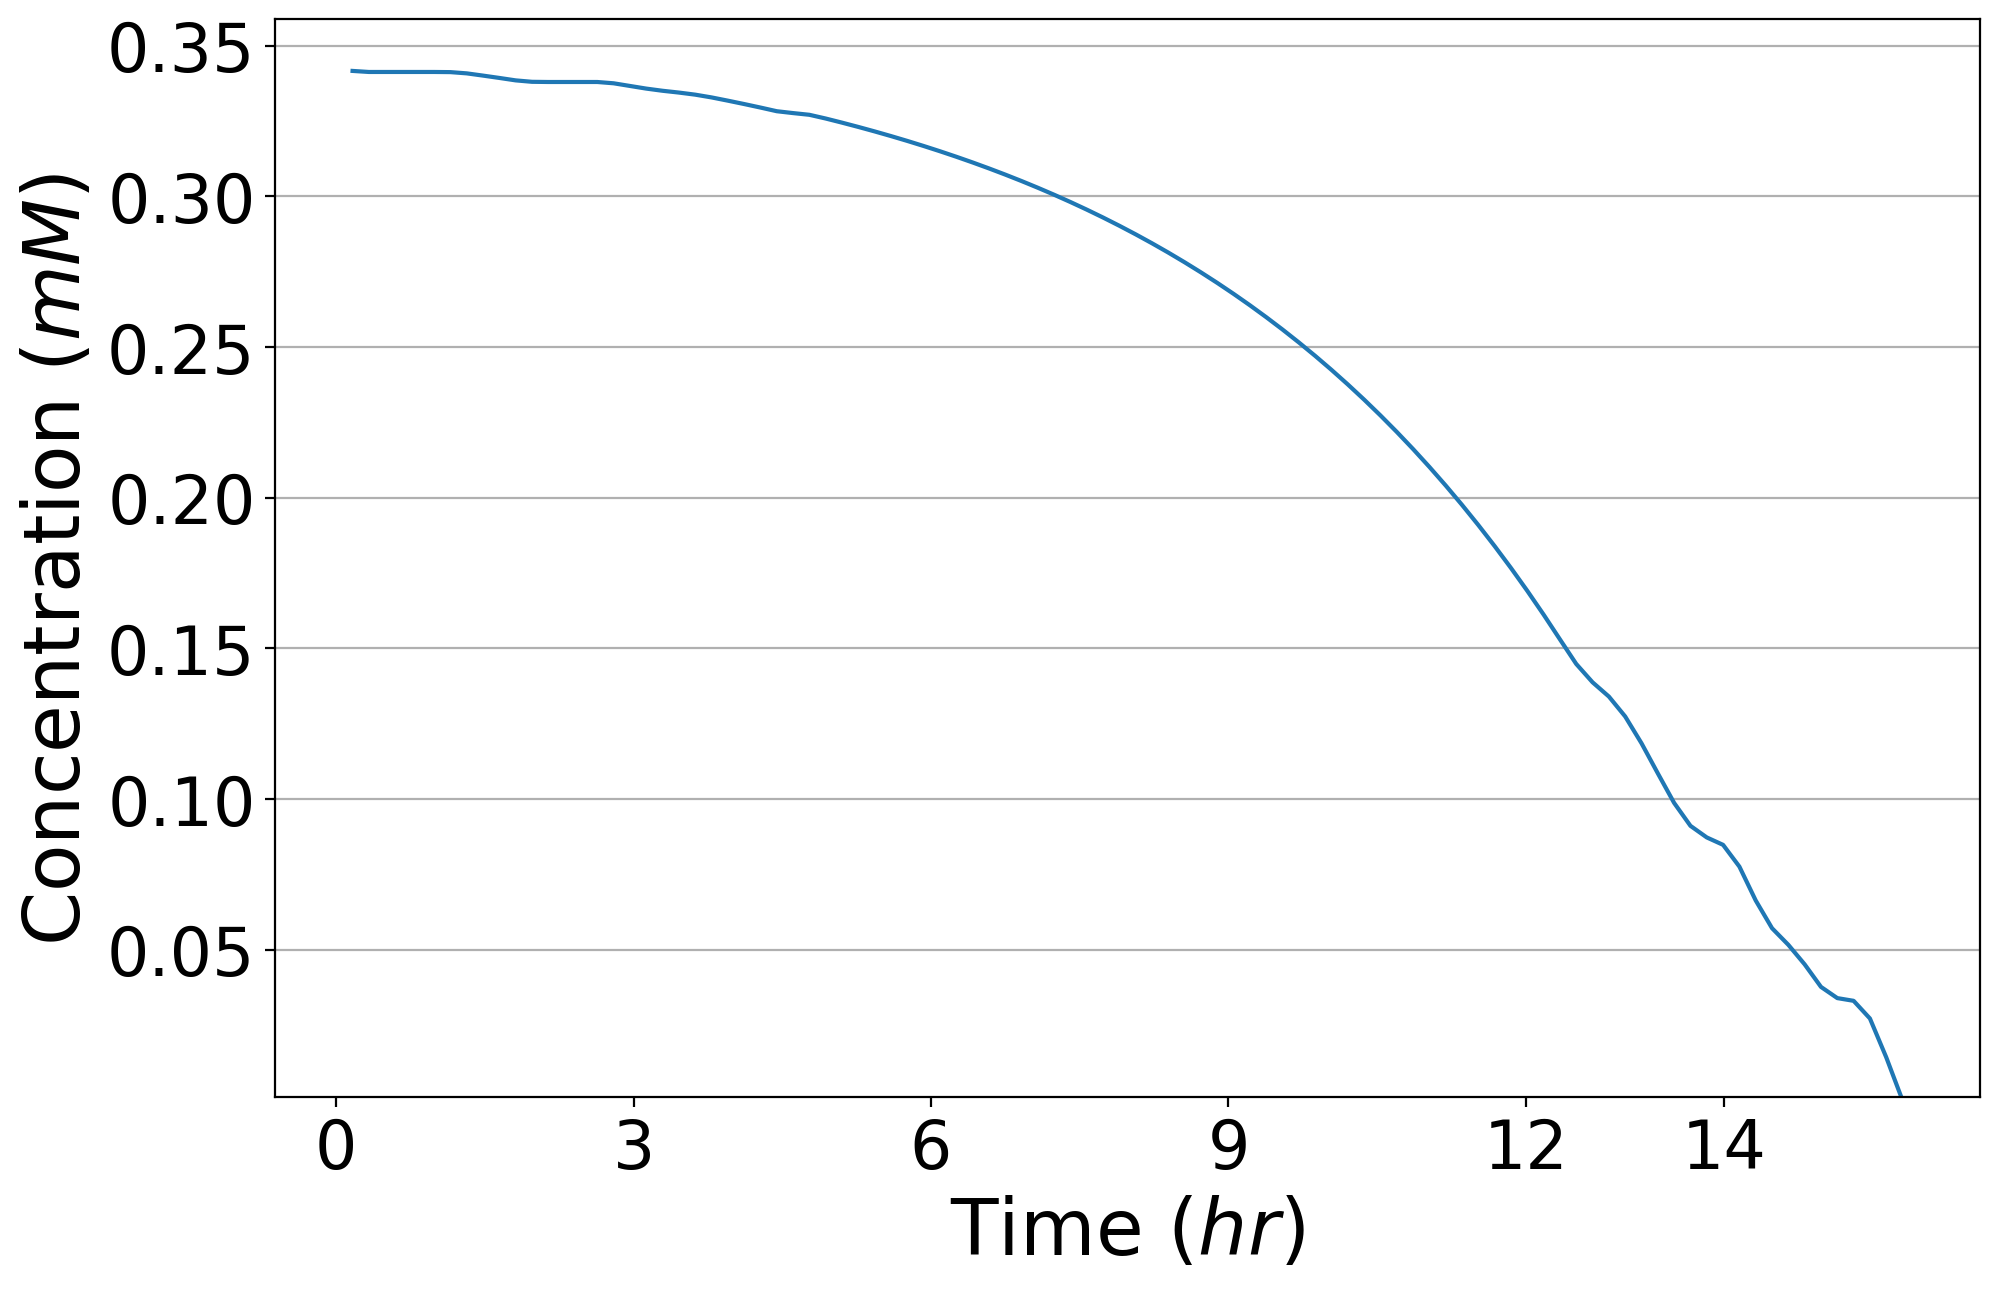

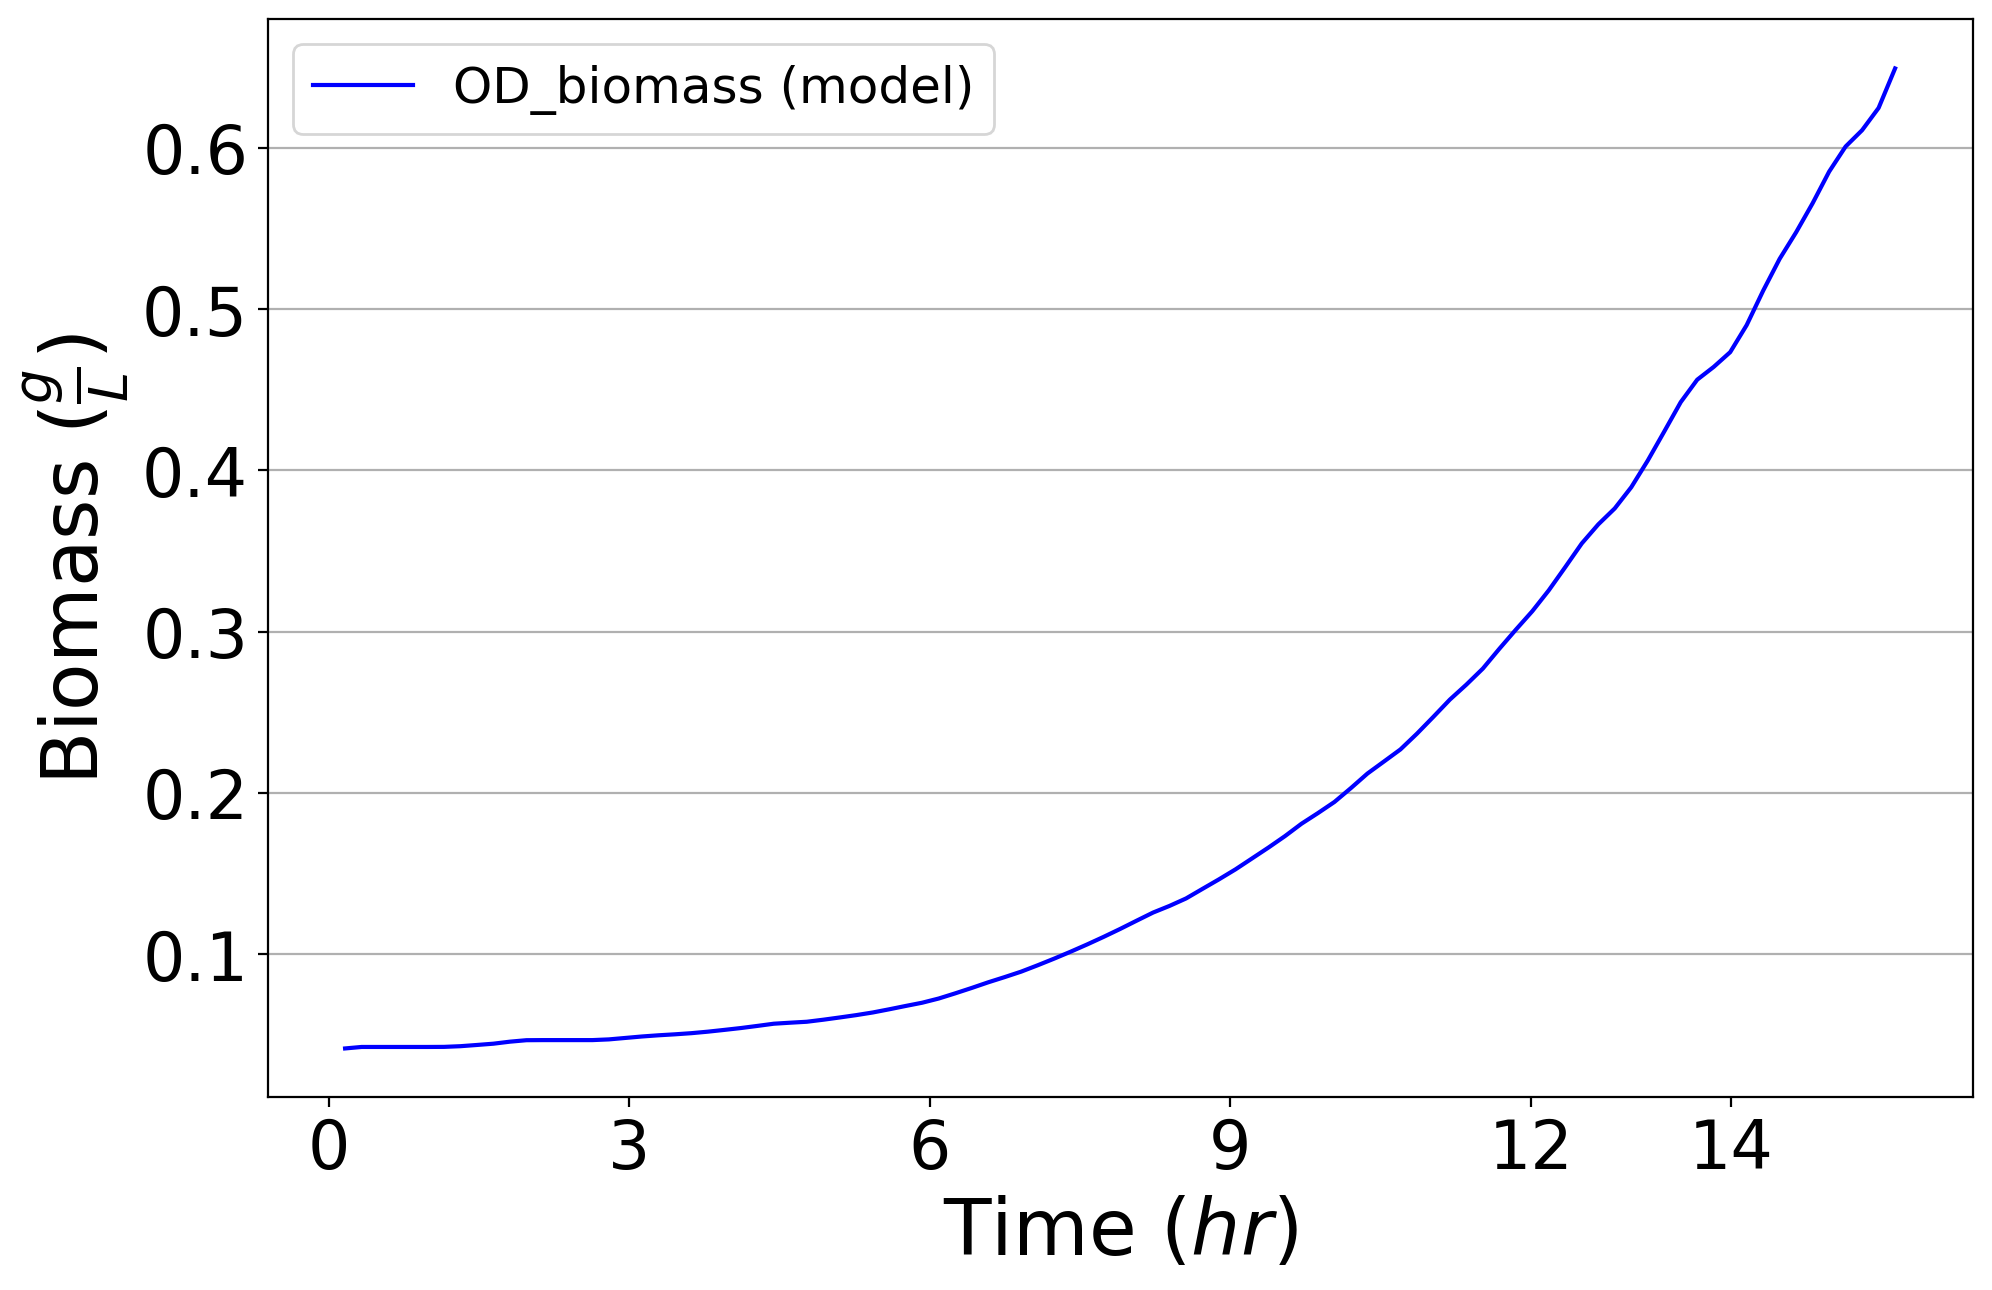

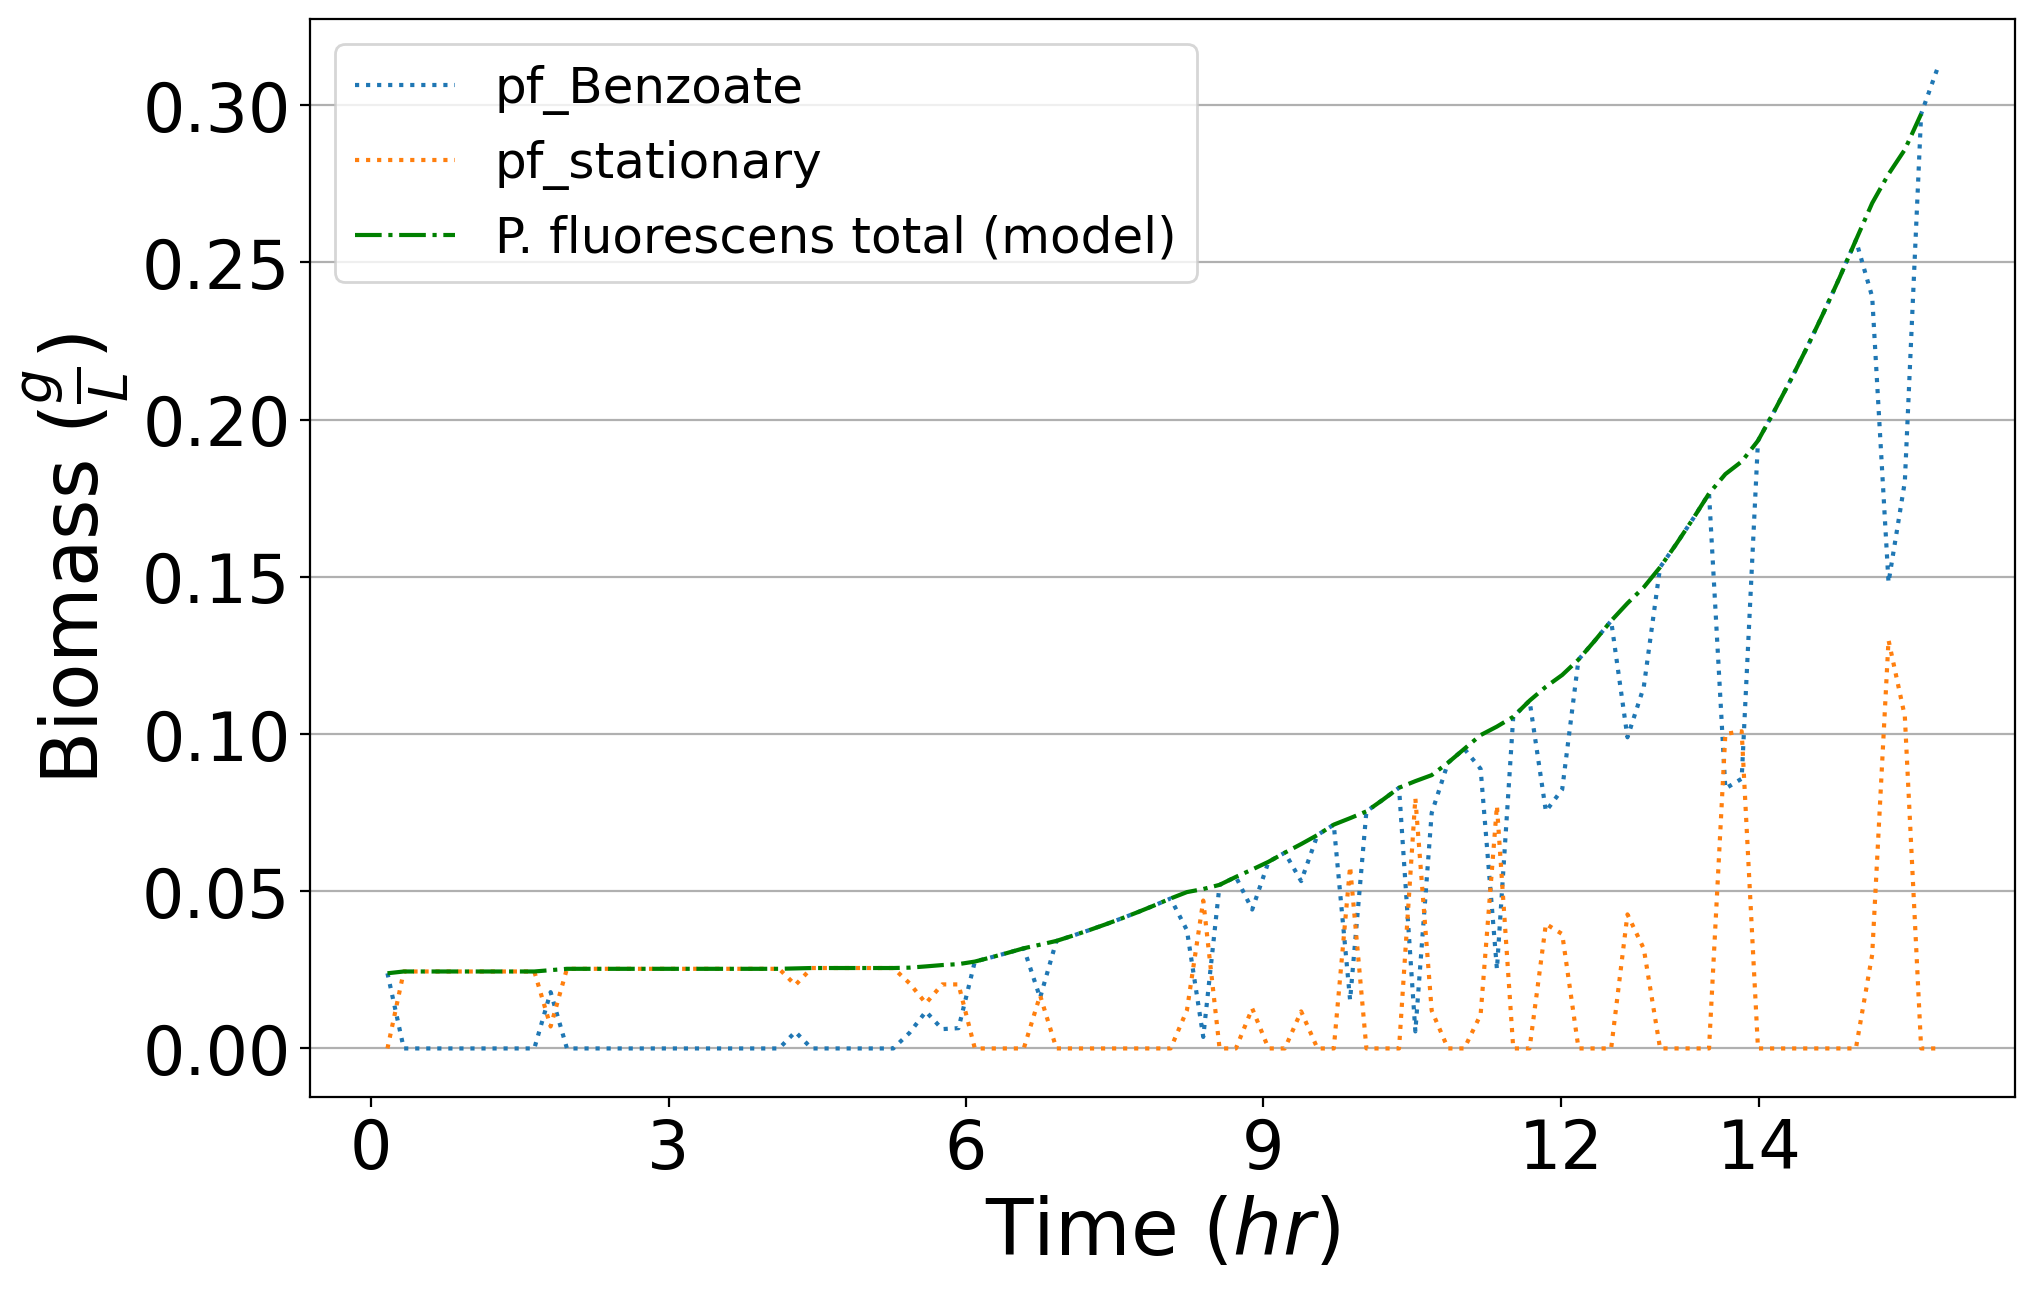

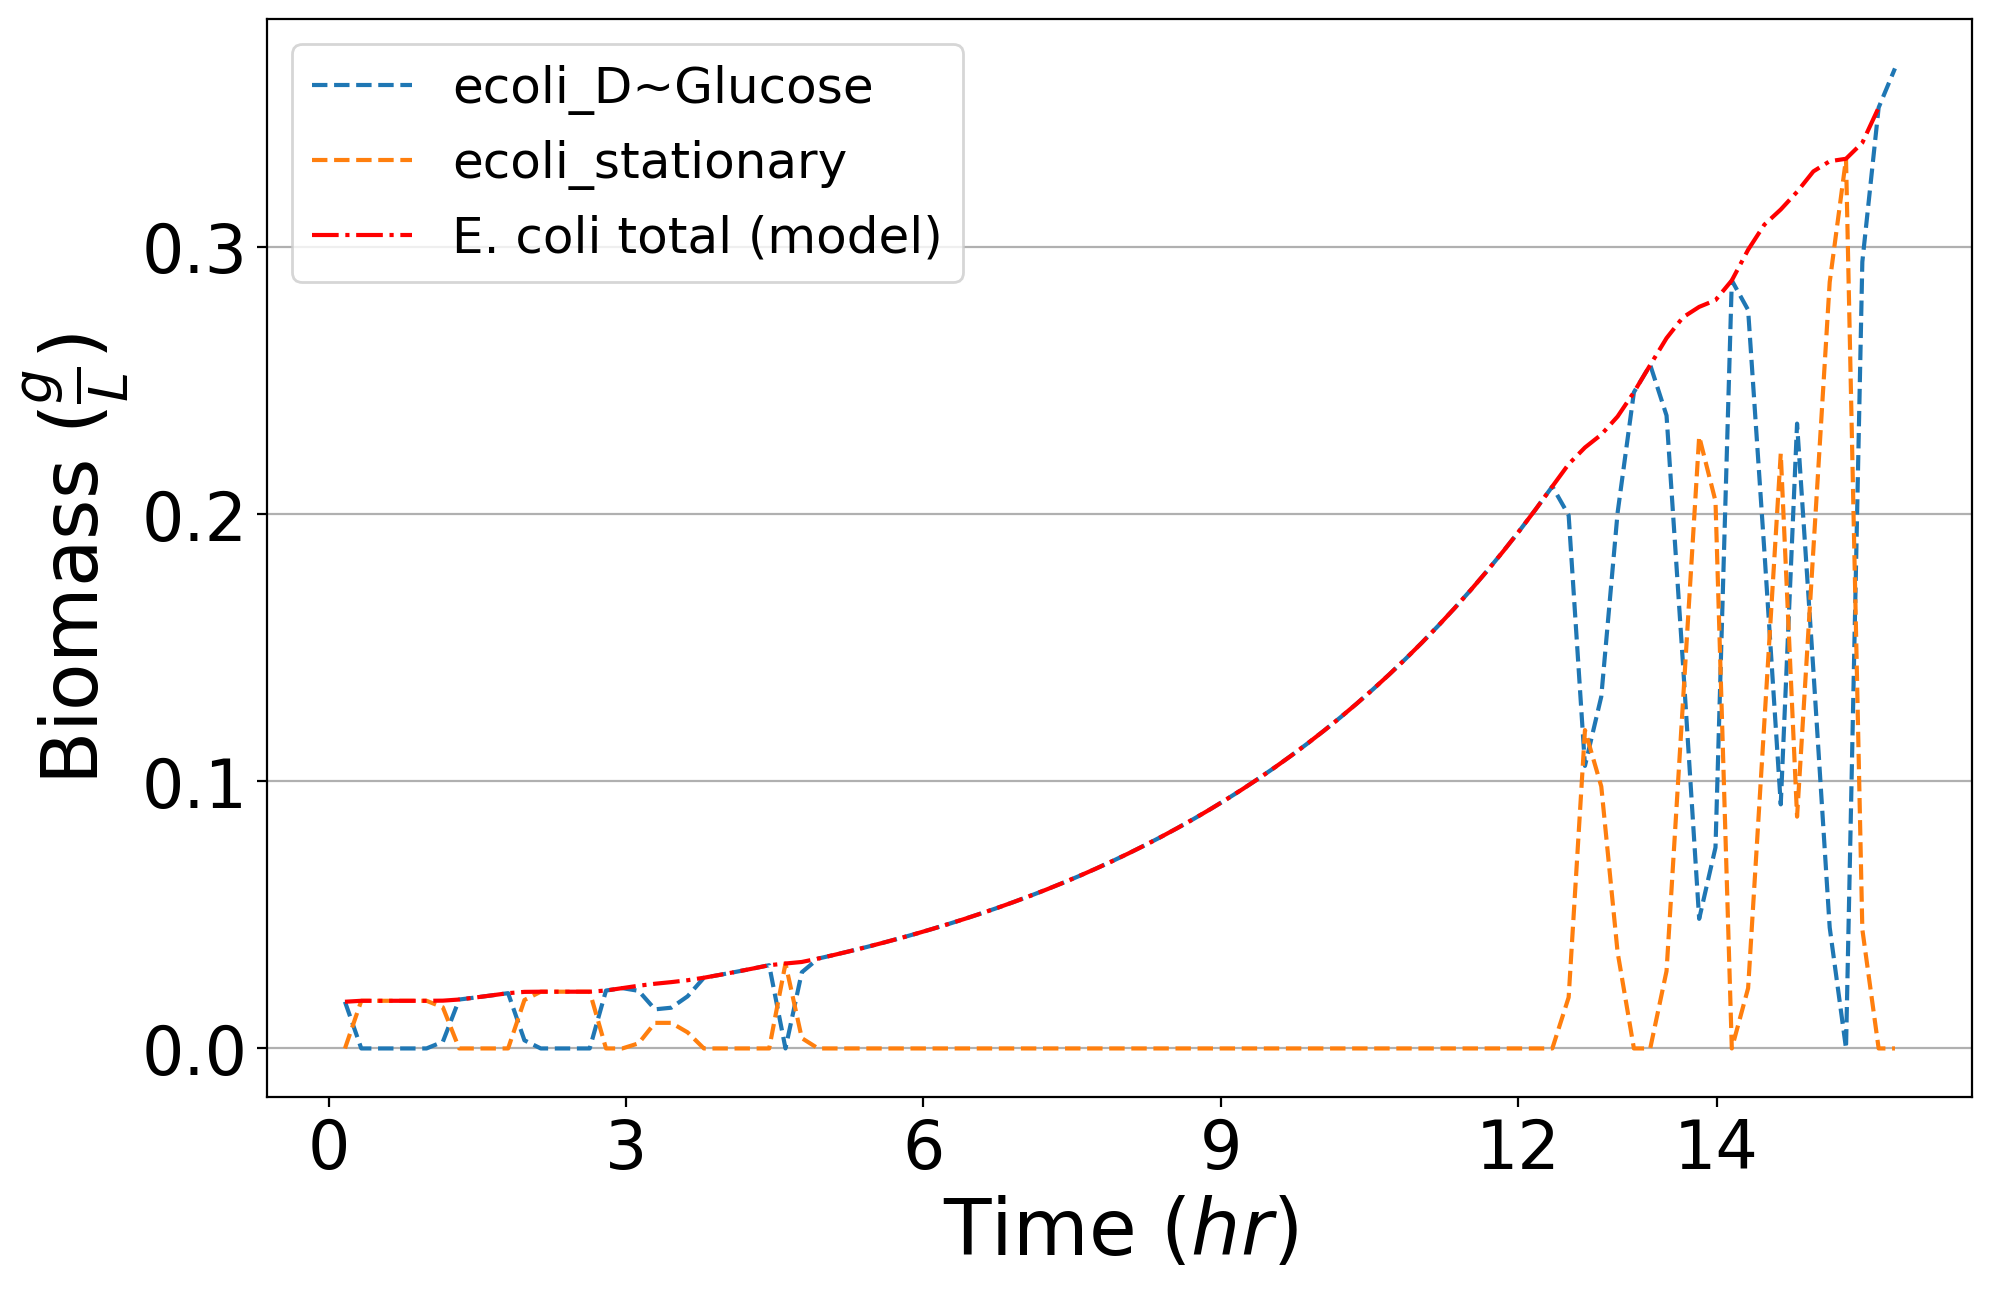

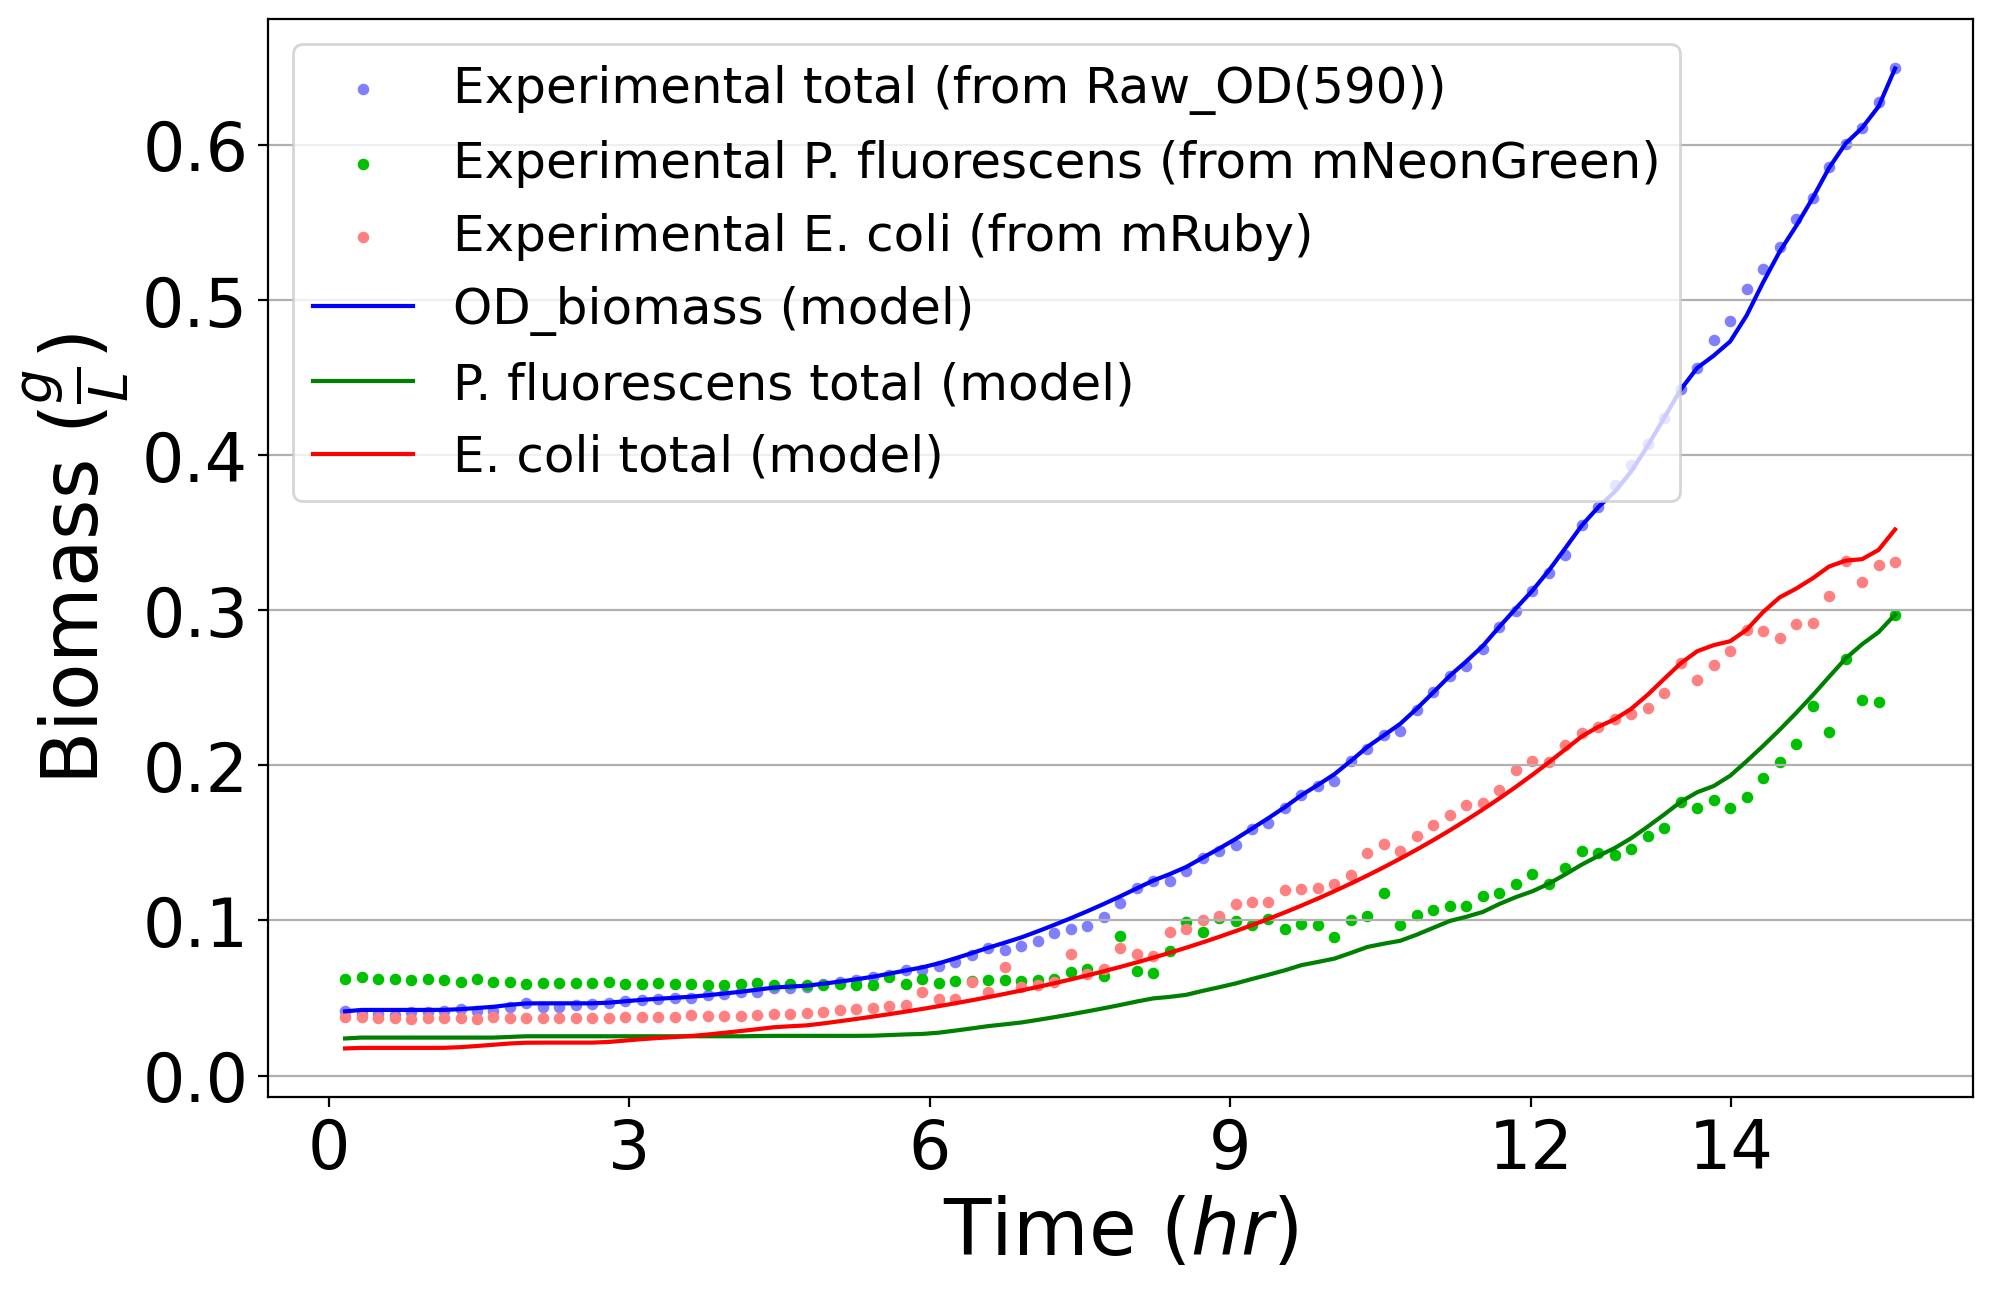

In [25]:
%%time 

muconic_acid_co.compute(update_graphs("G6"), None, None, True, "test_primals_simple.json")

In [ ]:
from modelseedpy import MSCommPhitting

test_com = MSCommPhitting('/Users/ashleyeng/Documents/Python/ModelSEEDDatabase',
                           community_members = {
                                ecoli: {
                                    'name': 'ecoli', 
                                    'phenotypes': {
                                        'Maltose': {"consumed":["cpd00179"],
                                                 "excreted":["cpd00029"]}, 
                                        'Acetate': {"consumed":["cpd00029"]},
                                     }
                                },
                                pf: {
                                    'name': 'pf',
                                    'phenotypes': {
                                        'Acetate': {"consumed":["cpd00029"]},
                                        '4-Hydroxybenzoate': {"consumed":["cpd00136"]}
                                    }
                                }
                            },
                            data_paths = {'path':"data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx", 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                            species_abundances = species_abundances,
                            carbon_conc = carbon_conc_series,
                            ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
                            species_identities_rows = species_identities_rows)

test_com.fit(parameters = {'cvmin': .1, 'bcv': 0.0001, "stationary": 5e-3},
             mets_to_track = ["cpd00179","cpd00029"],
             rel_final_conc = {"cpd00179":0.1},
             zero_start = ["cpd00029", "cpd00136"],
             abs_final_conc = {"cpd00029":0}, # metabolomics data
             graphs=update_graphs("G6"),
             export_zip_name = 'maltose_co.zip',
             export_lp = "maltose_coculture_simple.lp",
             primals_export_path="test_primals_simple.json")


 GCF_000005845.2.RAST.mdl

 GCF_001612705.1.RAST.mdl
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.12550559 1.12537038 1.12105398 1.11597471 1.11273534 1.12893569
 1.13334937 1.133368

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/zipfile.py:1505: UserWarning: Duplicate name: 'parameters.csv'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/zipfile.py:1505: UserWarning: Duplicate name: 'maltose_coculture_simple.lp'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/zipfile.py:1505: UserWarning: Duplicate name: 'CommPhitting.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
